<a href="https://colab.research.google.com/github/akshithsrinivas23bce5078/2nd-Project-MLDS/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries (Abhishek Dubey)
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# reading csv file
mcdonalds = pd.read_csv('mcdonalds.csv')

In [ ]:
# A.4 Exploring Data
print("Column names:", mcdonalds.columns.tolist())
print("Dimensions:", mcdonalds.shape)
mcdonalds.head()

Column names: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
Dimensions: (1453, 15)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
# MD.x <- as.matrix(mcdonalds[, 1:11])
MD_x = mcdonalds.iloc[:, 0:11].values
# MD.x <- (MD.x == "Yes") + 0
MD_x = (MD_x == "Yes").astype(int)
# round(colMeans(MD.x), 2)
rounded_means = np.round(np.mean(MD_x, axis=0), 2)
print(rounded_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
MD_pca = PCA()
MD_pca.fit(MD_x)

print("\t \t".ljust(4) + " ".join([f"\t PC{i+1}" for i in range(len(MD_pca.components_))]))

# Standard deviation
std_dev = np.sqrt(MD_pca.explained_variance_)
print("Standard deviation".ljust(23) + "\t".join([f"{s:.4f}" for s in std_dev]))

# Proportion of Variance
prop_var = MD_pca.explained_variance_ratio_
print("Proportion of Variance".ljust(23) + "\t".join([f"{p:.4f}" for p in prop_var]))

# Cumulative Proportion
cum_prop = np.cumsum(prop_var)
print("Cumulative Proportion".ljust(23) + "\t".join([f"{c:.5f}" for c in cum_prop]))

	 	 	 PC1 	 PC2 	 PC3 	 PC4 	 PC5 	 PC6 	 PC7 	 PC8 	 PC9 	 PC10 	 PC11
Standard deviation     0.7570	0.6075	0.5046	0.3988	0.3374	0.3103	0.2897	0.2751	0.2653	0.2488	0.2369
Proportion of Variance 0.2994	0.1928	0.1330	0.0831	0.0595	0.0503	0.0438	0.0395	0.0368	0.0324	0.0293
Cumulative Proportion  0.29945	0.49224	0.62529	0.70839	0.76787	0.81817	0.86201	0.90156	0.93832	0.97068	1.00000


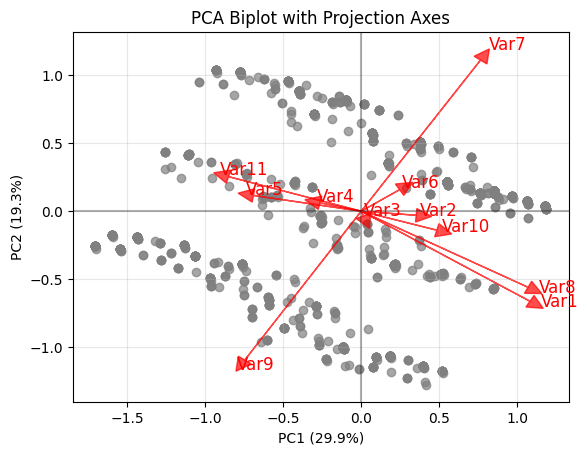

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

MD_pca_scores = MD_pca.transform(MD_x)
def projAxes(pca, features=None):
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    # Ploting  scores
    plt.scatter(MD_pca_scores[:, 0], MD_pca_scores[:, 1], color='grey', alpha=0.7)
    # Ploting loading vectors
    for i in range(loadings.shape[0]):
        plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3,
                 head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
        if features is not None:
            plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2,
                    features[i], color='red', fontsize=12)
        else:
            plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2,
                    f'Var{i+1}', color='red', fontsize=12)

    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    plt.title('PCA Biplot with Projection Axes')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.show()
projAxes(MD_pca)


---Extracting segments using K-Means-------



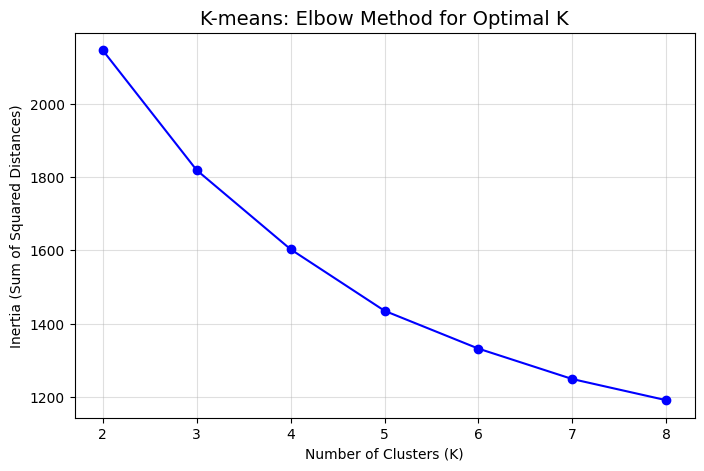

Selecting K = 4 clusters (common choice based on Elbow/PCA structure).

K-means Segment Sizes:
0    364
1    240
2    533
3    316
Name: count, dtype: int64

K-means Segment Profiles (Cluster Means - Probability of 'Yes'):
   yummy  convenient  spicy  fattening  greasy   fast  cheap  tasty  \
0  0.019       0.907  0.082      0.931   0.596  0.956  0.901  0.286   
1  0.021       0.679  0.075      0.917   0.708  0.742  0.067  0.079   
2  0.966       0.981  0.084      0.779   0.349  0.959  0.923  0.974   
3  0.873       0.959  0.136      0.905   0.608  0.858  0.108  0.930   

   expensive  healthy  disgusting  
0      0.014    0.074       0.330  
1      0.896    0.062       0.725  
2      0.019    0.340       0.047  
3      0.918    0.209       0.108  


In [ ]:
column_names_for_segmentation = [
    'yummy', 'convenient', 'spicy', 'fattening', 'greasy',
    'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'
]

from sklearn.cluster import KMeans
inertia = []
k_range = range(2,9)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10, init='k-means++')
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.title('K-means: Elbow Method for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True, alpha=0.4)
plt.xticks(k_range)
plt.show()

n_segments_kmeans = 4
print(f"Selecting K = {n_segments_kmeans} clusters (common choice based on Elbow/PCA structure).")

kmeans_4 = KMeans(n_clusters=n_segments_kmeans, random_state=1234, n_init=10, init='k-means++')
kmeans_4.fit(MD_x)
MD_k4_labels = kmeans_4.labels_

segment_sizes_kmeans = pd.Series(MD_k4_labels).value_counts().sort_index()
segment_means_kmeans = pd.DataFrame(kmeans_4.cluster_centers_, columns=column_names_for_segmentation)

print("\nK-means Segment Sizes:")
print(segment_sizes_kmeans)

print("\nK-means Segment Profiles (Cluster Means - Probability of 'Yes'):")
print(np.round(segment_means_kmeans, 3))



--- A.5.2 Extracting Segments using Gaussian Mixture Model (GMM) ---


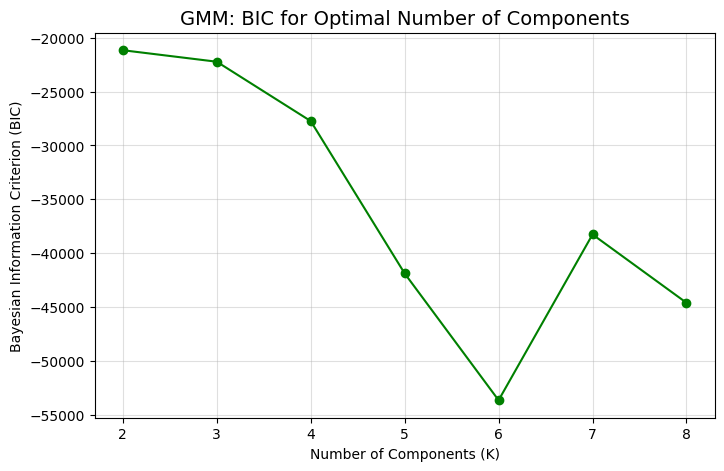


Optimal number of components based on minimum BIC: K = 6

GMM Segment Sizes (Expected Count):
0    414.0
1     91.0
2     78.0
3    162.0
4    339.0
5    369.0
dtype: float64

GMM Segment Profiles (Component Means - Probability of 'Yes'):
   yummy  convenient  spicy  fattening  greasy   fast  cheap  tasty  \
0  1.000       1.000  0.000      0.824   0.408  0.959  1.000  1.000   
1  0.813       1.000  1.000      0.769   0.582  0.945  0.637  0.923   
2  0.269       0.000  0.090      0.705   0.577  0.731  0.628  0.359   
3  0.000       0.654  0.068      1.000   0.747  0.722  0.000  0.000   
4  0.000       1.000  0.080      0.897   0.549  1.000  0.855  0.336   
5  0.797       1.000  0.000      0.889   0.518  0.846  0.160  0.802   

   expensive  healthy  disgusting  
0      0.000    0.319       0.046  
1      0.505    0.429       0.187  
2      0.321    0.128       0.538  
3      1.000    0.000       0.710  
4      0.000    0.100       0.310  
5      0.778    0.201       0.149  


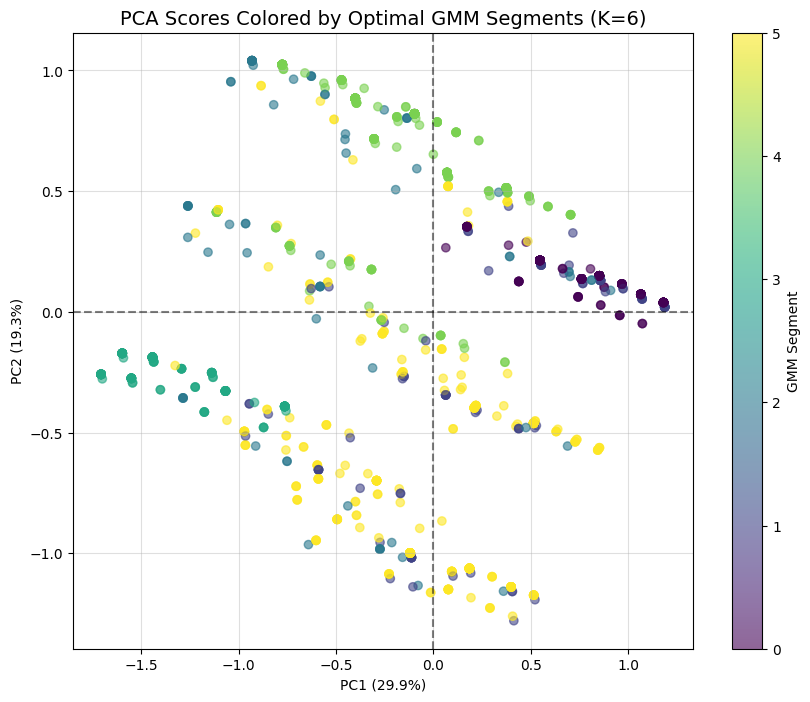

In [ ]:
#(Akshith Srinivas)
# A.5.2 Extracting using using mixture of distribution
print("\n--- A.5.2 Extracting Segments using Gaussian Mixture Model (GMM) ---")
from sklearn.mixture import GaussianMixture
# Step 1: Determine optimal number of components using BIC
n_components_range = range(2, 9)
bic_results = []
models = {}

for n_components in n_components_range:
    # Use 'full' covariance type for the mixture model (equivalent to VEE/VVV in MCLUST/R)
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=1234, n_init=5)
    gmm.fit(MD_x)
    bic_results.append(gmm.bic(MD_x))
    models[n_components] = gmm

# Step 2: Plot BIC results
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, bic_results, marker='o', linestyle='-', color='g')
plt.title('GMM: BIC for Optimal Number of Components', fontsize=14)
plt.xlabel('Number of Components (K)')
plt.ylabel('Bayesian Information Criterion (BIC)')
plt.grid(True, alpha=0.4)
plt.xticks(n_components_range)
plt.show()

# Step 3: Select the optimal model (minimum BIC)
best_k_gmm = n_components_range[np.argmin(bic_results)]
best_gmm = models[best_k_gmm]
print(f"\nOptimal number of components based on minimum BIC: K = {best_k_gmm}")

# Step 4: Summarize segment sizes and profiles
# Get component memberships (predictions)
MD_gmm_labels = best_gmm.predict(MD_x)

# Get segment sizes (weighted by posterior probabilities)
# The GMM component proportions (weights_) multiplied by total samples gives the estimated size
segment_proportions_gmm = best_gmm.weights_
segment_sizes_gmm = pd.Series(segment_proportions_gmm * len(MD_x)).sort_index()
segment_means_gmm = pd.DataFrame(best_gmm.means_, columns=column_names_for_segmentation)

print("\nGMM Segment Sizes (Expected Count):")
print(np.round(segment_sizes_gmm, 0))

print("\nGMM Segment Profiles (Component Means - Probability of 'Yes'):")
print(np.round(segment_means_gmm, 3))

# Optional: Visualize the selected GMM segments on the PCA biplot
plt.figure(figsize=(10, 8))
# Scatter plot, colored by GMM segments
scatter = plt.scatter(MD_pca_scores[:, 0], MD_pca_scores[:, 1], c=MD_gmm_labels, cmap='viridis', alpha=0.6)
plt.xlabel(f'PC1 ({MD_pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({MD_pca.explained_variance_ratio_[1]:.1%})')
plt.title(f'PCA Scores Colored by Optimal GMM Segments (K={best_k_gmm})', fontsize=14)
plt.colorbar(scatter, ticks=range(best_k_gmm), label='GMM Segment')
plt.grid(True, alpha=0.4)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
#(Abhishek Dubey)
# A.5.3 Extracting using regression model
# Frequency table of 'Like'
like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)
print(like_counts)

# Convert 'Like' to numeric
mcdonalds['Like_num'] = mcdonalds['Like'].astype(str).str.extract(r'(-?\d+)').astype(float)
mcdonalds['Like_n'] = 6 - mcdonalds['Like_num']

# Frequency table of the transformed variable
like_n_counts = mcdonalds['Like_n'].value_counts().sort_index()
print(like_n_counts)

# Get the first 11 column names
cols = mcdonalds.columns[:11]

# Create formula string
f = "Like_n ~ " + " + ".join(cols)

print(f)



Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64
Like_n
1.0     143
2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
11.0    152
Name: count, dtype: int64
Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Make a copy of your DataFrame to avoid modifying the original
MD_encoded = mcdonalds.copy()

# Encode non-numeric columns automatically
for col in MD_encoded.columns[:11]:
    if MD_encoded[col].dtype == 'object':
        le = LabelEncoder()
        MD_encoded[col] = le.fit_transform(MD_encoded[col].astype(str))

# Prepare X and y
X = MD_encoded.iloc[:, :11].values
y = MD_encoded['Like_n'].values


# Random seed (equivalent to set.seed(1234))
np.random.seed(1234)

# Step 1: initialize mixture on target
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
clusters = gmm.fit_predict(y.reshape(-1, 1))

# Step 2: fit regression models per cluster
models = []
for c in range(2):
    reg = LinearRegression().fit(X[clusters == c], y[clusters == c])
    models.append(reg)

# Step 3: reassign based on min prediction error
pred_errors = np.zeros((len(y), 2))
for c in range(2):
    pred_errors[:, c] = np.abs(y - models[c].predict(X))
final_clusters = np.argmin(pred_errors, axis=1)

# Step 4: summarize
unique, counts = np.unique(final_clusters, return_counts=True)
print("Cluster sizes:")
for i, c in zip(unique + 1, counts):
    print(f"Cluster {i}: {c}")

for i, reg in enumerate(models, start=1):
    print(f"\nCluster {i} coefficients:")
    print(pd.Series(reg.coef_, index=MD_encoded.columns[:11]))
    print(f"Intercept: {reg.intercept_:.3f}")

Cluster sizes:
Cluster 1: 1110
Cluster 2: 343

Cluster 1 coefficients:
yummy        -1.759680
convenient   -0.007266
spicy         0.341650
fattening     0.412876
greasy        0.257677
fast         -0.401454
cheap        -0.341582
tasty        -0.709067
expensive    -0.332579
healthy      -0.435318
disgusting    0.672056
dtype: float64
Intercept: 5.889

Cluster 2 coefficients:
yummy        -0.085773
convenient   -0.405606
spicy         0.032142
fattening     0.302693
greasy       -0.060922
fast         -0.099682
cheap        -0.118279
tasty         0.051813
expensive    -0.122937
healthy      -0.133709
disgusting    0.491499
dtype: float64
Intercept: 10.160


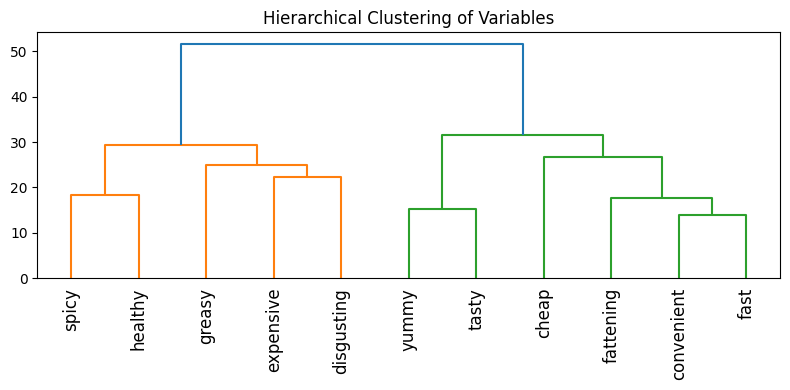

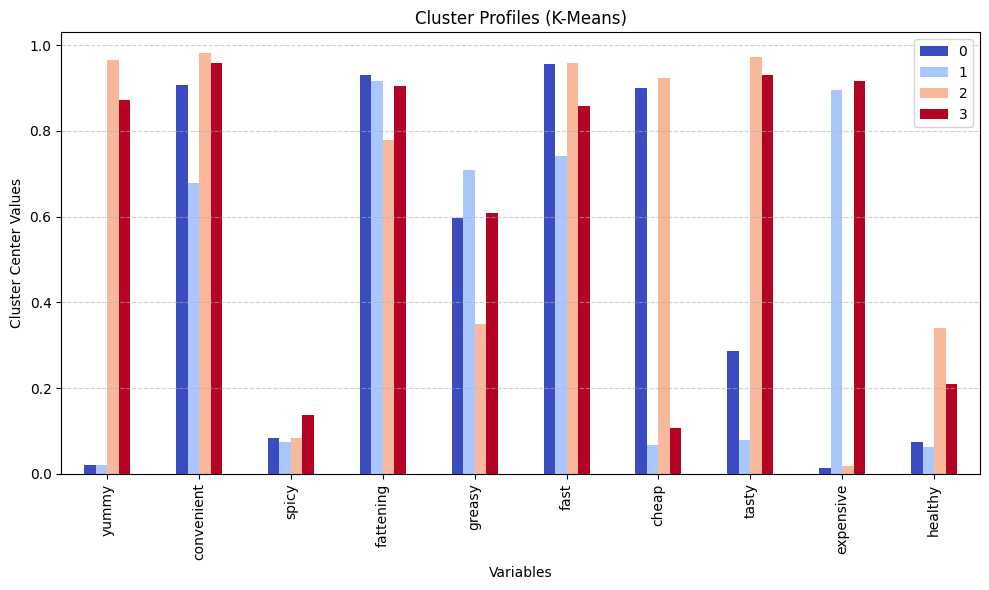

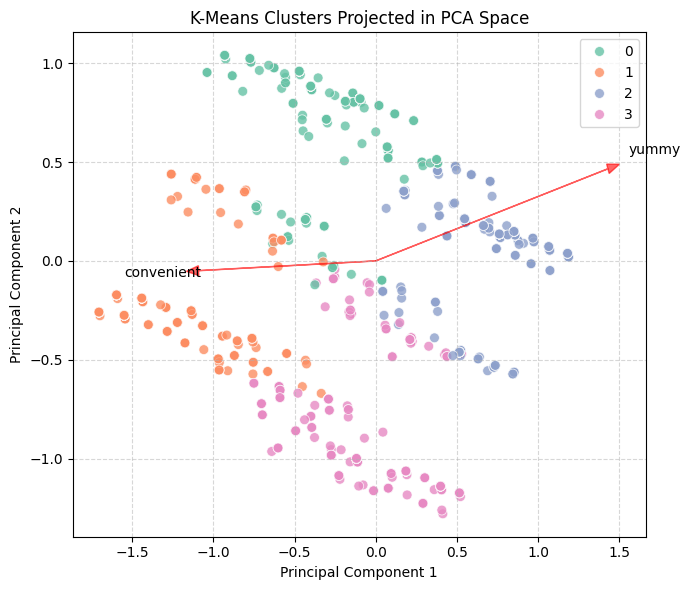

In [ ]:
# Abhishek Dubey
# A.6 Profiting Segment
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

feature_names = [
    'yummy', 'convenient', 'spicy', 'fattening', 'greasy',
    'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'
]

MD_x = pd.DataFrame(MD_x, columns=feature_names)

# Hierarchical clustering on variables
from scipy.spatial.distance import pdist

Z = linkage(pdist(MD_x.T), method='ward')

# Dendrogram to visualize variable clustering (optional)
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=MD_x.columns, leaf_rotation=90)
plt.title("Hierarchical Clustering of Variables")
plt.tight_layout()
plt.show()

# Create a DataFrame of cluster centers
centers_df = pd.DataFrame(
    kmeans_4.cluster_centers_,
    columns=MD_x.columns
)

# Sort variables
var_order = [MD_x.columns[i] for i in np.argsort(Z[:, 2])[:len(MD_x.columns)]]

# Plot as bar chart
centers_df[var_order].T.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title("Cluster Profiles (K-Means)")
plt.ylabel("Cluster Center Values")
plt.xlabel("Variables")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Plot PCA projection colored by cluster
plt.figure(figsize=(7,6))
sns.scatterplot(
    x=MD_pca[:,0], y=MD_pca[:,1],
    hue=kmeans_4.labels_,
    palette='Set2', s=50, alpha=0.8
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters Projected in PCA Space")

# Add PCA axes
origin = np.zeros(2)
for length, vector, name in zip(pca.explained_variance_ratio_, pca.components_, MD_x.columns):
    v = vector * 3  # scale for visibility
    plt.arrow(origin[0], origin[1], v[0], v[1],
              color='red', alpha=0.6, head_width=0.05)
    plt.text(v[0]*1.2, v[1]*1.2, name, color='black', ha='center', va='center')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# A.7 Describing Segemnt (Akshith Srinivas)
print("\n----Describing segments using K-Means K = 4----\n")
# Identify Yes/No feature columns
feature_names = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Convert Yes/No to 1/0
mcdonalds[feature_names] = mcdonalds[feature_names].applymap(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

print("\nConverted 'Yes'/'No' features to numeric (1/0).")

# Now groupby mean will work
print("\nSegment Profiles by Key Attributes (Cluster Means, K=4):")
print(np.round(mcdonalds.groupby('Segment')[feature_names].mean(), 3))


# Combine K-Means labels with the original data for descriptive analysis
mcdonalds['Segment'] = MD_k4_labels

demographic_cols = mcdonalds.columns[11:].tolist()

print("\nSegment Sizes (K=4):")
print(mcdonalds['Segment'].value_counts().sort_index())

# Profile segments by the 11 binary attributes (mean 'Yes' probability)
print("\nSegment Profiles by Key Attributes (Cluster Means, K=4):")
print(np.round(mcdonalds.groupby('Segment')[feature_names].mean(), 3))

# Profile segments by demographics
print("\nSegment Profiles by Demographics (Mean Age, Proportion Female, etc.):")
demographic_summary = mcdonalds.groupby('Segment').agg({
    'Age': 'mean',
    'Gender': lambda x: (x == 'Female').mean(),  # Proportion Female
    'VisitFrequency': lambda x: (x == 'Once a month').mean()  # Proportion 'Once a month' for illustrative purpose
}).rename(columns={'Gender': 'Prop_Female', 'VisitFrequency': 'Prop_Visit_Monthly'})

print(np.round(demographic_summary, 3))





----Describing segments using K-Means K = 4----


Converted 'Yes'/'No' features to numeric (1/0).

Segment Profiles by Key Attributes (Cluster Means, K=4):
         yummy  convenient  spicy  fattening  greasy   fast  cheap  tasty  \
Segment                                                                     
0        0.019       0.907  0.082      0.931   0.596  0.956  0.901  0.286   
1        0.021       0.679  0.075      0.917   0.708  0.742  0.067  0.079   
2        0.966       0.981  0.084      0.779   0.349  0.959  0.923  0.974   
3        0.873       0.959  0.136      0.905   0.608  0.858  0.108  0.930   

         expensive  healthy  disgusting  
Segment                                  
0            0.014    0.074       0.330  
1            0.896    0.062       0.725  
2            0.019    0.340       0.047  
3            0.918    0.209       0.108  

Segment Sizes (K=4):
Segment
0    364
1    240
2    533
3    316
Name: count, dtype: int64

Segment Profiles by Key Attributes 

/tmp/ipython-input-63206284.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mcdonalds[feature_names] = mcdonalds[feature_names].applymap(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)



--- Selecting the Target Segment ---



/tmp/ipython-input-3272323716.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Age', data=mcdonalds, palette='Set3')


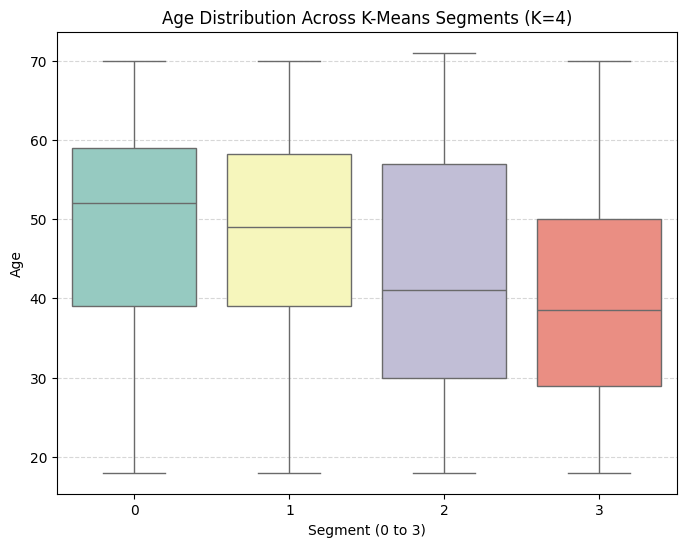

In [ ]:
# A.8 selecting the target segment (Akshith Srinivas)
print("\n--- Selecting the Target Segment ---\n")

# Example visualization for a selection criterion (Age)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segment', y='Age', data=mcdonalds, palette='Set3')
plt.title('Age Distribution Across K-Means Segments (K=4)')
plt.xlabel('Segment (0 to 3)')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
